In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import regionmask

In [2]:
data_path_monthly = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\Temp_NetCDF.nc"

with xr.open_dataset(data_path_monthly) as file_nc:
    monthly_forecast_temp_xr = file_nc

monthly_forecast_temp_xr

<xarray.Dataset>
Dimensions:  (lon: 29, lat: 31, time: 157)
Coordinates:
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * time     (time) datetime64[ns] 1997-01-16 1997-02-15 ... 2010-01-16
Data variables:
    tmx      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Maximum Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2204291347. Data generated from:TMX derived from g...
    history:      Fri 29 Apr 19:21:57 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [8]:
path = "./som_adm_ocha_itos_20230308_shp/" #sdn_adm_cbs_nic_ssa_20200831_shp/" 

states_gdf = gpd.read_file(path+"som_admbnda_adm1_ocha_20230308.shp") #sdn_admbnda_adm1_cbs_nic_ssa_20200831.shp")
#states_gdf

In [4]:
Awdal_aoi = states_gdf[states_gdf.ADM1_EN == "Awdal"]

# Get the total spatial extent for Awdal
Awdal_aoi.total_bounds

array([42.68310547,  9.6572876 , 44.23667672, 11.5114659 ])

In [5]:
# Get lat min, max
aoi_lat = [float(Awdal_aoi.total_bounds[1]), float(Awdal_aoi.total_bounds[3])]
aoi_lon = [float(Awdal_aoi.total_bounds[0]), float(Awdal_aoi.total_bounds[2])]

aoi_lat, aoi_lon

([9.657287598000039, 11.511465902000054],
 [42.683105469000054, 44.23667671700008])

In [6]:
# Slice the data by time and spatial extent
start_date = "2009-04-15"
end_date = "2009-06-15"

two_months_Awdal = monthly_forecast_temp_xr["tmx"].sel(
    time=slice(start_date, end_date),
    lon=slice(aoi_lon[0], aoi_lon[1]),
    lat=slice(aoi_lat[0], aoi_lat[1]))
two_months_Awdal

<xarray.DataArray 'tmx' (time: 2, lat: 4, lon: 3)>
[24 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 2009-04-16 2009-05-16
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

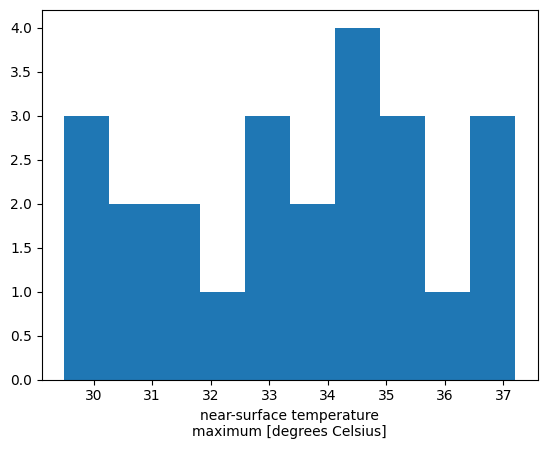

In [7]:
# Plot an histogram
two_months_Awdal.plot()
plt.show()

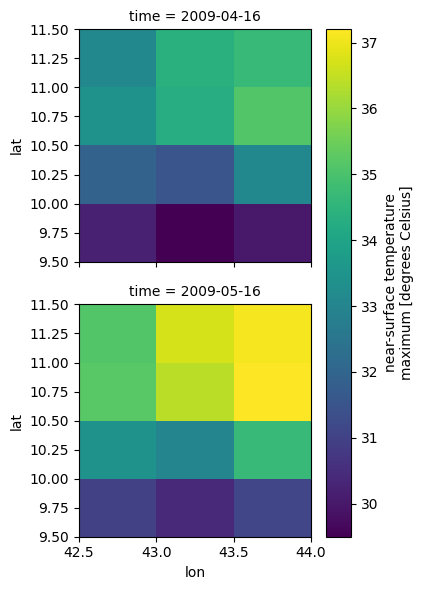

In [8]:
# Spatial Plot for the selected AOI (Awdal)
two_months_Awdal.plot(col='time',
                     col_wrap=1)

plt.show()

In [9]:
# Only subset by location / not time
Awdal_ts = monthly_forecast_temp_xr["tmx"].sel(
    lon=slice(aoi_lon[0], aoi_lon[1]),
    lat=slice(aoi_lat[0], aoi_lat[1]))
Awdal_ts

<xarray.DataArray 'tmx' (time: 157, lat: 4, lon: 3)>
[1884 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1997-01-16 1997-02-15 ... 2010-01-16
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [10]:
# Time series plot of max temperature per year for Awdal

# This is the max value in each pixel across all months for each year
Awdal_annual_max = Awdal_ts.groupby('time.year').max(skipna=True)
Awdal_annual_max

<xarray.DataArray 'tmx' (year: 14, lat: 4, lon: 3)>
array([[[29.4     , 29.300001, 30.7     ],
        [33.4     , 33.600002, 36.3     ],
        [37.2     , 39.4     , 40.3     ],
        [38.100002, 41.2     , 41.100002]],

       [[31.1     , 30.7     , 31.6     ],
        [34.600002, 34.2     , 36.600002],
        [37.4     , 39.3     , 40.100002],
        [38.      , 41.100002, 40.9     ]],

       [[30.800001, 30.300001, 31.1     ],
        [33.2     , 32.8     , 35.4     ],
        [36.100002, 38.5     , 39.4     ],
        [37.      , 40.3     , 40.100002]],

       [[30.1     , 29.6     , 30.6     ],
        [33.600002, 33.3     , 35.9     ],
        [36.7     , 39.      , 39.9     ],
        [37.600002, 40.9     , 40.8     ]],

...

       [[30.1     , 29.6     , 30.6     ],
        [33.2     , 33.      , 35.600002],
        [36.      , 38.5     , 39.600002],
        [36.9     , 40.3     , 40.4     ]],

       [[29.9     , 29.7     , 31.300001],
        [33.5     , 33.8     , 36.8     ],
        [37.100002, 39.7     , 40.7     ],
        [38.      , 41.4     , 41.5     ]],

       [[31.300001, 30.9     , 31.800001],
        [34.9     , 34.5     , 36.8     ],
        [37.7     , 39.5     , 40.3     ],
        [38.100002, 41.2     , 41.      ]],

       [[27.2     , 26.9     , 27.1     ],
        [28.1     , 28.      , 29.6     ],
        [29.1     , 30.2     , 31.      ],
        [28.6     , 30.1     , 30.5     ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 42.75 43.25 43.75
  * lat      (lat) float32 9.75 10.25 10.75 11.25
  * year     (year) int64 1997 1998 1999 2000 2001 ... 2006 2007 2008 2009 2010
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [11]:
Awdal_annual_max_val = Awdal_annual_max.groupby("year").max(["lat", "lon"])
Awdal_annual_max_val

<xarray.DataArray 'tmx' (year: 14)>
array([41.2     , 41.100002, 40.3     , 40.9     , 41.3     , 42.2     ,
       40.4     , 41.2     , 40.9     , 41.2     , 40.4     , 41.5     ,
       41.2     , 31.      ], dtype=float32)
Coordinates:
  * year     (year) int64 1997 1998 1999 2000 2001 ... 2006 2007 2008 2009 2010

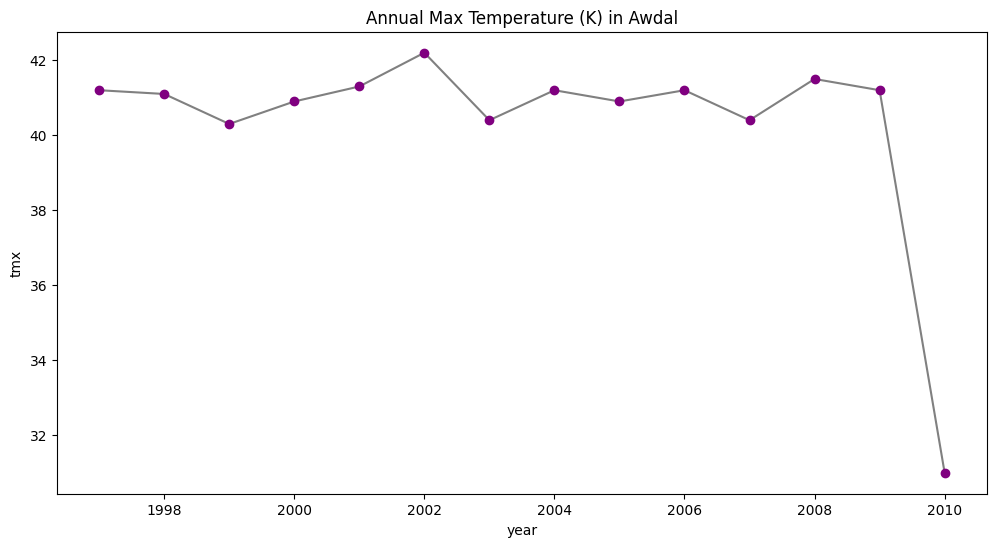

In [12]:
# Plot the data
f, ax = plt.subplots(figsize=(12, 6))
Awdal_annual_max_val.plot.line(hue='lat',
                              marker="o",
                              ax=ax,
                              color="grey",
                              markerfacecolor="purple",
                              markeredgecolor="purple")
ax.set(title="Annual Max Temperature (K) in Awdal")
plt.show()

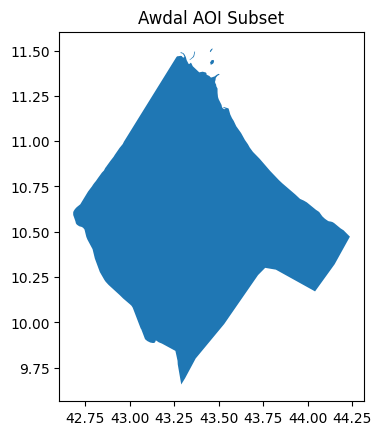

In [13]:
# This is the AOI of interest. You only want to calculate summary values for
# pixels within this AOI rather the entire rectangular spatial extent.
f, ax = plt.subplots()
Awdal_aoi.plot(ax=ax)
ax.set(title="Awdal AOI Subset")

plt.show()

In [14]:
Awdal_aoi

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,5.657071,1.312224,Awdal,SO11,Somalia,SO,2022-12-21,2023-03-08,NaN,"MULTIPOLYGON (((43.46189 11.42429, 43.45532 11..."


In [15]:
Awdal_mask = regionmask.mask_3D_geopandas(Awdal_aoi,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
Awdal_mask

<xarray.DataArray 'mask' (region: 1, lat: 31, lon: 29)>
array([[[False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
...
        [False, False, False, False, False,  True,  True, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False]]])
Coordinates:
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * region   (region) int32 0
Attributes:
    standard_name:  region

In [16]:
# Slice out two months of data
two_months = monthly_forecast_temp_xr.sel(
    time=slice('2009-10-25', '2009-12-15'))

In [17]:
# Apply the mask for Awdal to the data
two_months = two_months.where(Awdal_mask)
two_months

<xarray.Dataset>
Dimensions:  (time: 1, lat: 31, lon: 29, region: 1)
Coordinates:
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * time     (time) datetime64[ns] 2009-11-16
  * region   (region) int32 0
Data variables:
    tmx      (time, lat, lon, region) float32 nan nan nan nan ... nan nan nan
    stn      (time, lat, lon, region) float64 nan nan nan nan ... nan nan nan
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.06 Maximum Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2204291347. Data generated from:TMX derived from g...
    history:      Fri 29 Apr 19:21:57 BST 2022 : User f098 : Program makegrid...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

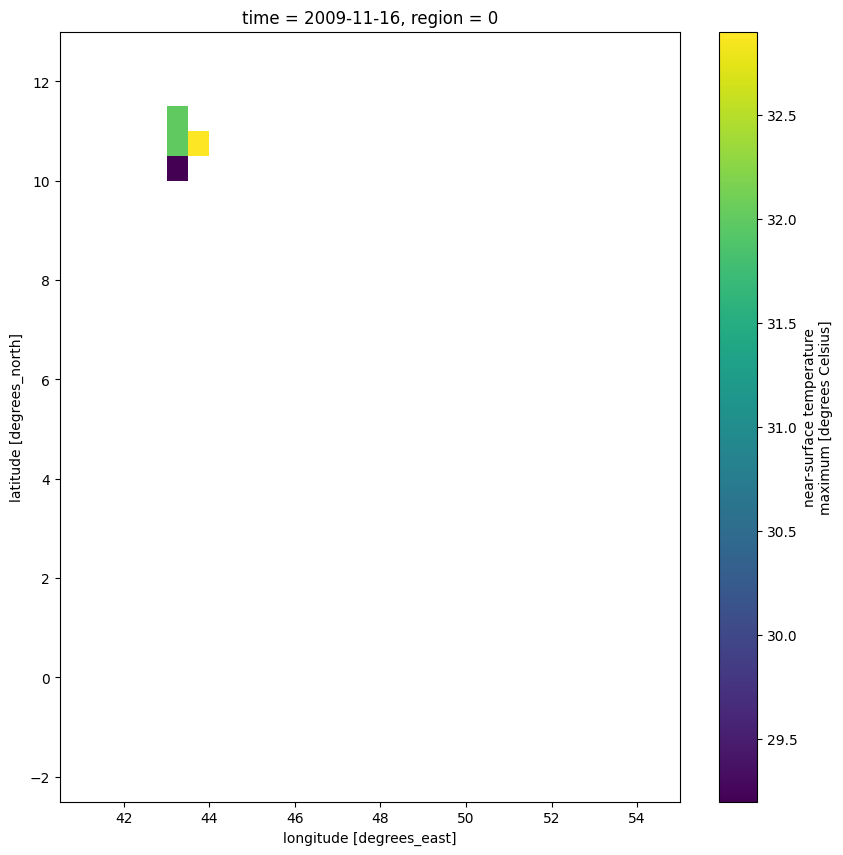

In [18]:
two_months["tmx"].plot(#col='time',
                                   col_wrap=1,
                                   figsize=(10, 10))
plt.show()

In [19]:
two_months_masked = monthly_forecast_temp_xr["tmx"].sel(time=slice('2009-11-15', '2009-12-15'),
                                                                    lon=slice(aoi_lon[0],
                                                                              aoi_lon[1]),
                                                                    lat=slice(aoi_lat[0],
                                                                              aoi_lat[1])).where(Awdal_mask)
two_months_masked.dims

('time', 'lat', 'lon', 'region')

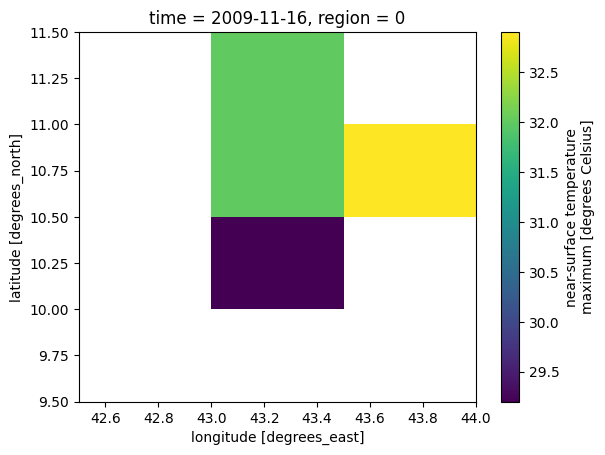

In [20]:
two_months_masked.plot(col_wrap=1)
plt.show()

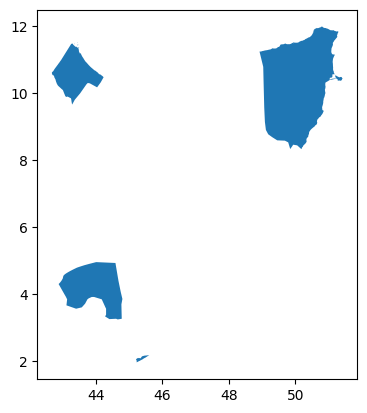

In [21]:
# Start by extracting a few states from the states_gdf
states_gdf["ADM1_EN"]

regions_nev = states_gdf[states_gdf.ADM1_EN.isin(
    ["Awdal", "Bakool", "Banadir", "Bari"])]
regions_nev.plot()
plt.show()

In [22]:
regions_mask = regionmask.mask_3D_geopandas(regions_nev,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
regions_mask

<xarray.DataArray 'mask' (region: 3, lat: 31, lon: 29)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * region   (region) int32 0 1 3
Attributes:
    standard_name:  region

In [23]:
def get_aoi(shp, world=True):
    """Takes a geopandas object and converts it to a lat/ lon
    extent 

    Parameters
    -----------
    shp : GeoPandas GeoDataFrame
        A geodataframe containing the spatial boundary of interest
    world : boolean
        True if you want lat / long to represent sinusoidal (0-360 degrees)

    Returns
    -------
    Dictionary of lat and lon spatial bounds
    """

    lon_lat = {}
    # Get lat min, max
    aoi_lat = [float(shp.total_bounds[1]), float(shp.total_bounds[3])]
    aoi_lon = [float(shp.total_bounds[0]), float(shp.total_bounds[2])]

    #if world:
        #aoi_lon[0] = aoi_lon[0] + 360
        #aoi_lon[1] = aoi_lon[1] + 360
    lon_lat["lon"] = aoi_lon
    lon_lat["lat"] = aoi_lat
    return lon_lat


bounds = get_aoi(regions_nev)

In [25]:
# Slice the data
start_date = "2000-01-15"
end_date = "2000-02-15"

# Subset
two_months_region = monthly_forecast_temp_xr["tmx"].sel(
    time=slice(start_date, end_date),
    lon=slice(bounds["lon"][0], bounds["lon"][1]),
    lat=slice(bounds["lat"][0], bounds["lat"][1]))
two_months_region

<xarray.DataArray 'tmx' (time: 2, lat: 20, lon: 18)>
[720 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 42.75 43.25 43.75 44.25 ... 49.75 50.25 50.75 51.25
  * lat      (lat) float32 2.25 2.75 3.25 3.75 4.25 ... 10.25 10.75 11.25 11.75
  * time     (time) datetime64[ns] 2000-01-16 2000-02-15
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

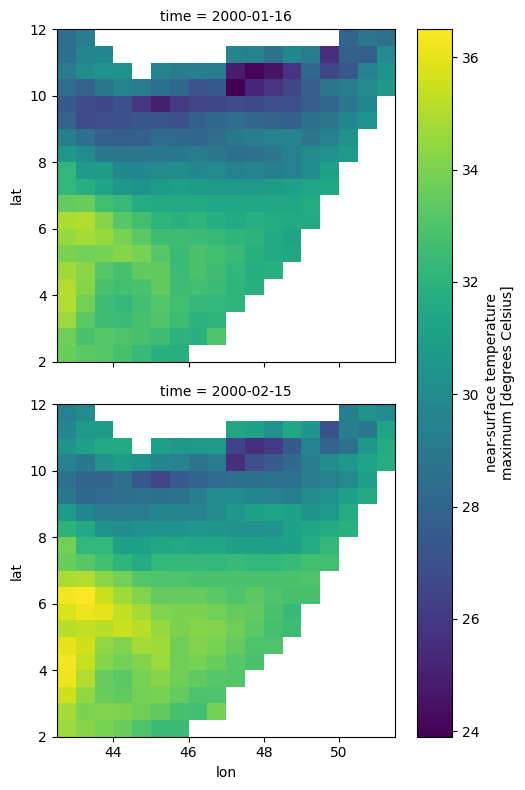

In [26]:
two_months_region.plot(col="time",
                           col_wrap=1,
                           figsize=(5, 8))
plt.show()

In [27]:
# Apply the mask for the west coast subset
two_months_region = two_months_region.where(regions_mask)
two_months_region.dims

('time', 'lat', 'lon', 'region')

In [28]:
two_months_region.region

<xarray.DataArray 'region' (region: 3)>
array([0, 1, 3])
Coordinates:
  * region   (region) int32 0 1 3

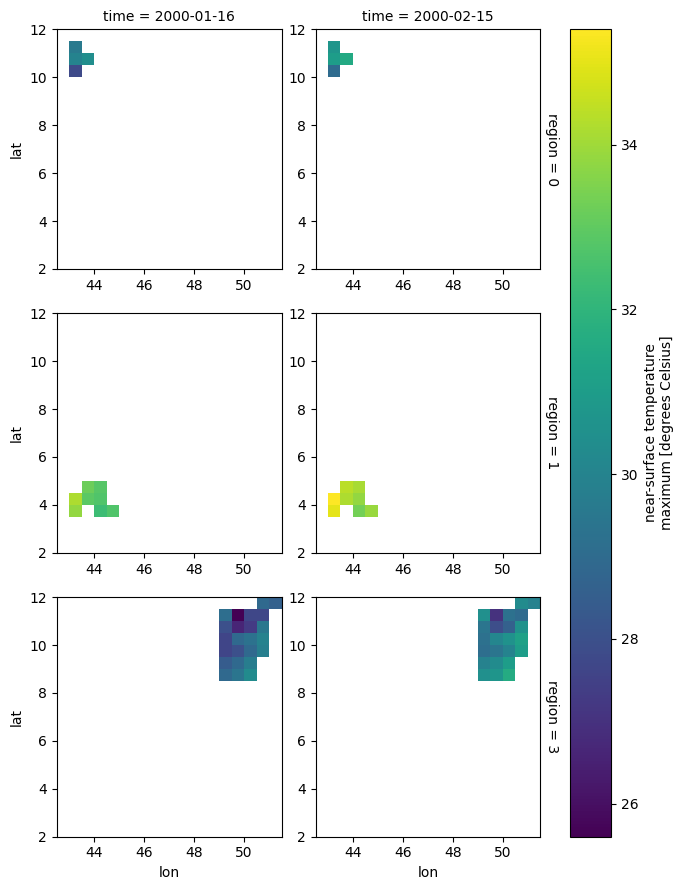

In [29]:
two_months_region.plot(col="time",
                           row="region",
                           sharey=False, sharex=False)
plt.show()

In [30]:
summary = two_months_region.groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

tmx
time       region           
2000-01-16 0       29.450001
           1       33.075001
           3       28.525000
2000-02-15 0       30.549999
           1       34.262501
           3       29.875002

In [31]:
# Slice the data by time and spatial extent
start_date = "1997-01-01"
end_date = "2009-12-31"

monthly_forecast = monthly_forecast_temp_xr["tmx"].sel(
    time=slice(start_date, end_date))
monthly_forecast

<xarray.DataArray 'tmx' (time: 156, lat: 31, lon: 29)>
[140244 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * time     (time) datetime64[ns] 1997-01-16 1997-02-15 ... 2009-12-16
Attributes:
    long_name:                   near-surface temperature maximum
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [32]:
Awdal_aoi = states_gdf[states_gdf.ADM1_EN == "Awdal"]

Awdal_mask = regionmask.mask_3D_geopandas(Awdal_aoi,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)

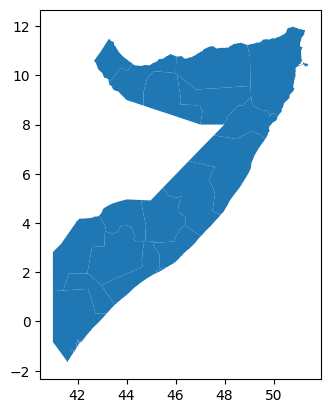

In [9]:
# Start by extracting a few states from the states_gdf
states_gdf["ADM1_EN"]

regions_nev = states_gdf[states_gdf.ADM1_EN.isin(states_gdf["ADM1_EN"])]
regions_nev.plot()
plt.show()

In [10]:
region_mask = regionmask.mask_3D_geopandas(regions_nev,
                                         monthly_forecast_temp_xr.lon,
                                         monthly_forecast_temp_xr.lat)
region_mask

<xarray.DataArray 'mask' (region: 17, lat: 31, lon: 29)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float32 -2.25 -1.75 -1.25 -0.75 ... 11.25 11.75 12.25 12.75
  * lon      (lon) float32 40.75 41.25 41.75 42.25 ... 53.25 53.75 54.25 54.75
  * region   (region) int32 0 1 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17
Attributes:
    standard_name:  region

In [11]:
summary = monthly_forecast.where(region_mask).groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

NameError: name 'monthly_forecast' is not defined

In [36]:
temperature = summary.to_dataframe()

In [37]:
temperature=temperature.reset_index(level=[ 1])

replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

# Replace values in the 'Column1' column using the dictionary
temperature['region'] = temperature['region'].replace(replacement_dict)

In [39]:
temperature = temperature.rename(columns={'region': 'admin1'})
temperature = temperature.reset_index(level=[ 0])

In [42]:
temperature

,time,admin1,tmx
0,1997-01-16,Awdal,29.400000
1,1997-01-16,Bakool,33.662498
2,1997-01-16,Bari,28.612501
3,1997-01-16,Bay,33.878574
4,1997-01-16,Galgaduud,32.711761
...,...,...,...
2647,2009-12-16,Nugaal,30.180002
2648,2009-12-16,Sanaag,27.405556
2649,2009-12-16,Sool,29.200003
2650,2009-12-16,Togdheer,28.929998


In [ ]:
temperature.to_csv('temperature.csv', index=False)

In [12]:
summary = monthly_forecast_temp_xr["tmx"].where(region_mask).groupby("time").mean(["lat", "lon"])
summary.to_dataframe()

tmx
time       region           
1997-01-16 0       29.400000
           1       33.662498
           3       28.612501
           4       33.878574
           5       32.711761
...                      ...
2010-01-16 13      30.170002
           14      27.155556
           15      28.966667
           16      28.429998
           17      28.860001

[2669 rows x 1 columns]

In [14]:
summary = summary.to_dataframe()
summary=summary.reset_index(level=[ 1])

replacement_dict = {0  :  'Awdal',
1    :         'Bakool',
2      :       'Banadir',
3      :         'Bari',
4       :         'Bay',
5        :  'Galgaduud',
6          :      'Gedo',
7          :   'Hiraan',
8   :       'Lower Juba',
9   :   'Lower Shabelle',
10  :      'Middle Juba',
11   : 'Middle Shabelle',
12    :          'Mudug',
13    :        'Nugaal',
14      :       'Sanaag',
15       :        'Sool',
16        :   'Togdheer',
17   : 'Woqooyi Galbeed'}

# Replace values in the 'Column1' column using the dictionary
summary['region'] = summary['region'].replace(replacement_dict)

In [15]:
summary = summary.rename(columns={'region': 'admin1'})
summary = summary.reset_index(level=[ 0])

In [16]:
summary.to_csv('temperature1.csv', index=False)